# K-means clustering

## import library

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [105]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))
print(x.shape, y.shape, feature.shape)
print(feature.dtype)

number of data : 1000
number of feature : 2
(1000,) (1000,) (1000, 2)
float64


## plot the input data

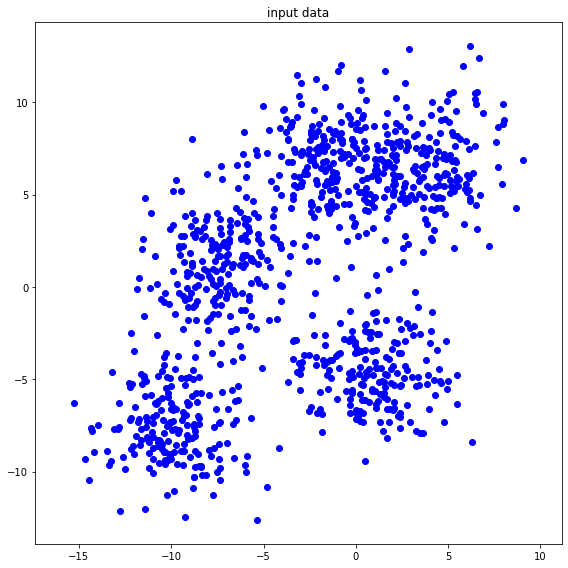

In [106]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x,y, 'o', color = 'blue')
plt.axis('equal')

plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [107]:
def compute_distance(feature, center):
    # data here has (1000,2) shape,   center.shape should be (1,2) shape or (2,)
    data_num = np.size(feature,0)
    center_ = center.reshape(1,2)

    # feature.shape = (1000,2)
    distance = feature - center_
    distance = distance**2
    distance = np.sum(distance, axis = 1).reshape(data_num,1)
    
    return distance
#print(compute_distance(feature,np.array([(2,5)])).shape)

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [108]:
def compute_centroid(feature, label_feature, value_label):
    data_num = feature.shape[0]
    m = feature.shape[1]
    # label_temp.shape = (n,1)
    label_temp = label_feature - value_label
    # temp_4_xor.shape = (n,1)
    temp_4_xor = np.ones((data_num,1))
    # In label_temp, only zeros convert to True
    only_selected_label = np.logical_xor(label_temp, temp_4_xor).reshape((data_num,1))
    # True element count
    true_count = np.sum( only_selected_label)
    
    cen = feature * only_selected_label
    cen = np.sum(cen, axis = 0) // true_count
    
    
    
    #cen = cen.reshape((1,m))
    
    # now we have to pick a dot which is the most close dot from the cen
    
    #close_dot = feature - cen
    #close_dot = close_dot ** 2
  
    #close_dot = np.sum(close_dot, axis = 1)
    

    #min_idx = np.argmin(close_dot)

    #centroid = feature[min_idx].reshape((1,m))
  
    
    
    centroid = cen
            
    
    
    
    
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [109]:
def compute_label(distance):
    data_num = distance.shape[0]
    result = []
    
    for i in range(data_num):
        result.append(np.argmin(distance[i]))
    index_label_feature = np.array(result).reshape((data_num,1))
    
    return index_label_feature


In [110]:
# ===================================================
import random
# assign the number of clusters and iterations
number_cluster      = 5
number_iteration    = 10000

label_cluster = [0,1,2,3,4]
# Initial clustering (1000,1)
label_feature = np.array([0]*number_data)
for i in range(feature.shape[0]):
    if feature[i][0]<-4 and feature[i][1] < -4:
        label_feature[i] = 0
    elif feature[i][0]>=-4 and feature[i][1] < 2:
        label_feature[i] = 1
    elif feature[i][0] < -3 and -4 <= feature[i][1]:
        label_feature[i] = 2
    elif -3 <= feature[i][0] <  3.5 and 2 <= feature[i][1]:
        label_feature[i] = 3
    else:
        label_feature[i] = 4

for i in range(400):
    label_feature[2*i] = (6*i) % 5
label_feature = label_feature.reshape(number_data, 1)

# ===================================================
#compute_distance(feature, center)  ==> n x 1
#compute_centroid(feature, label_feature, value_label) ==> 1 x m
#compute_label(distance) n x k ==> n x 1

In [111]:
#(1000,5)
distance            = np.zeros(shape=(number_data, number_cluster))
#(5,2)
centroid            = np.zeros(shape=(number_cluster, number_feature))
#(50000, 1)
loss_iteration      = np.zeros(shape=(number_iteration, 1))
#(50000,5,2)
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))


for i in range(number_iteration):
    
    for k in range(len(label_cluster)):
        # now_centroid.shape = (1,2)
        now_centroid = compute_centroid(feature, label_feature, label_cluster[k])
        # save
        centroid[k] = now_centroid
        
        
        distance[:,k] = compute_distance(feature, now_centroid).reshape(number_data,)
        
    #update label_feature
    #print(label_feature.reshape(label_feature.shape[0],))
    #print(distance)
    label_feature = compute_label(distance)
    #print(label_feature.reshape(label_feature.shape[0],))
    
    #update cetroid_iteration
    centroid_iteration[i] = centroid
    #print(centroid)
    # update loss
    loss = 0
    for j in range(len(distance)):
        loss += min(distance[j])
    loss /= number_data
    
    # save loss_iteration
    loss_iteration[i] = loss
    print("iterrrr", i," = ",loss)
print(label_feature.reshape(label_feature.shape[0],), )

iterrrr 0  =  17.74629181819768
iterrrr 1  =  8.125902237950687
iterrrr 2  =  8.310397198399766
iterrrr 3  =  8.44847614876834
iterrrr 4  =  8.44847614876834
iterrrr 5  =  8.44847614876834
iterrrr 6  =  8.44847614876834
iterrrr 7  =  8.44847614876834
iterrrr 8  =  8.44847614876834
iterrrr 9  =  8.44847614876834
iterrrr 10  =  8.44847614876834
iterrrr 11  =  8.44847614876834
iterrrr 12  =  8.44847614876834
iterrrr 13  =  8.44847614876834
iterrrr 14  =  8.44847614876834
iterrrr 15  =  8.44847614876834
iterrrr 16  =  8.44847614876834
iterrrr 17  =  8.44847614876834
iterrrr 18  =  8.44847614876834
iterrrr 19  =  8.44847614876834
iterrrr 20  =  8.44847614876834
iterrrr 21  =  8.44847614876834
iterrrr 22  =  8.44847614876834
iterrrr 23  =  8.44847614876834
iterrrr 24  =  8.44847614876834
iterrrr 25  =  8.44847614876834
iterrrr 26  =  8.44847614876834
iterrrr 27  =  8.44847614876834
iterrrr 28  =  8.44847614876834
iterrrr 29  =  8.44847614876834
iterrrr 30  =  8.44847614876834
iterrrr 31  =  

iterrrr 292  =  8.44847614876834
iterrrr 293  =  8.44847614876834
iterrrr 294  =  8.44847614876834
iterrrr 295  =  8.44847614876834
iterrrr 296  =  8.44847614876834
iterrrr 297  =  8.44847614876834
iterrrr 298  =  8.44847614876834
iterrrr 299  =  8.44847614876834
iterrrr 300  =  8.44847614876834
iterrrr 301  =  8.44847614876834
iterrrr 302  =  8.44847614876834
iterrrr 303  =  8.44847614876834
iterrrr 304  =  8.44847614876834
iterrrr 305  =  8.44847614876834
iterrrr 306  =  8.44847614876834
iterrrr 307  =  8.44847614876834
iterrrr 308  =  8.44847614876834
iterrrr 309  =  8.44847614876834
iterrrr 310  =  8.44847614876834
iterrrr 311  =  8.44847614876834
iterrrr 312  =  8.44847614876834
iterrrr 313  =  8.44847614876834
iterrrr 314  =  8.44847614876834
iterrrr 315  =  8.44847614876834
iterrrr 316  =  8.44847614876834
iterrrr 317  =  8.44847614876834
iterrrr 318  =  8.44847614876834
iterrrr 319  =  8.44847614876834
iterrrr 320  =  8.44847614876834
iterrrr 321  =  8.44847614876834
iterrrr 32

iterrrr 581  =  8.44847614876834
iterrrr 582  =  8.44847614876834
iterrrr 583  =  8.44847614876834
iterrrr 584  =  8.44847614876834
iterrrr 585  =  8.44847614876834
iterrrr 586  =  8.44847614876834
iterrrr 587  =  8.44847614876834
iterrrr 588  =  8.44847614876834
iterrrr 589  =  8.44847614876834
iterrrr 590  =  8.44847614876834
iterrrr 591  =  8.44847614876834
iterrrr 592  =  8.44847614876834
iterrrr 593  =  8.44847614876834
iterrrr 594  =  8.44847614876834
iterrrr 595  =  8.44847614876834
iterrrr 596  =  8.44847614876834
iterrrr 597  =  8.44847614876834
iterrrr 598  =  8.44847614876834
iterrrr 599  =  8.44847614876834
iterrrr 600  =  8.44847614876834
iterrrr 601  =  8.44847614876834
iterrrr 602  =  8.44847614876834
iterrrr 603  =  8.44847614876834
iterrrr 604  =  8.44847614876834
iterrrr 605  =  8.44847614876834
iterrrr 606  =  8.44847614876834
iterrrr 607  =  8.44847614876834
iterrrr 608  =  8.44847614876834
iterrrr 609  =  8.44847614876834
iterrrr 610  =  8.44847614876834
iterrrr 61

iterrrr 876  =  8.44847614876834
iterrrr 877  =  8.44847614876834
iterrrr 878  =  8.44847614876834
iterrrr 879  =  8.44847614876834
iterrrr 880  =  8.44847614876834
iterrrr 881  =  8.44847614876834
iterrrr 882  =  8.44847614876834
iterrrr 883  =  8.44847614876834
iterrrr 884  =  8.44847614876834
iterrrr 885  =  8.44847614876834
iterrrr 886  =  8.44847614876834
iterrrr 887  =  8.44847614876834
iterrrr 888  =  8.44847614876834
iterrrr 889  =  8.44847614876834
iterrrr 890  =  8.44847614876834
iterrrr 891  =  8.44847614876834
iterrrr 892  =  8.44847614876834
iterrrr 893  =  8.44847614876834
iterrrr 894  =  8.44847614876834
iterrrr 895  =  8.44847614876834
iterrrr 896  =  8.44847614876834
iterrrr 897  =  8.44847614876834
iterrrr 898  =  8.44847614876834
iterrrr 899  =  8.44847614876834
iterrrr 900  =  8.44847614876834
iterrrr 901  =  8.44847614876834
iterrrr 902  =  8.44847614876834
iterrrr 903  =  8.44847614876834
iterrrr 904  =  8.44847614876834
iterrrr 905  =  8.44847614876834
iterrrr 90

iterrrr 1143  =  8.44847614876834
iterrrr 1144  =  8.44847614876834
iterrrr 1145  =  8.44847614876834
iterrrr 1146  =  8.44847614876834
iterrrr 1147  =  8.44847614876834
iterrrr 1148  =  8.44847614876834
iterrrr 1149  =  8.44847614876834
iterrrr 1150  =  8.44847614876834
iterrrr 1151  =  8.44847614876834
iterrrr 1152  =  8.44847614876834
iterrrr 1153  =  8.44847614876834
iterrrr 1154  =  8.44847614876834
iterrrr 1155  =  8.44847614876834
iterrrr 1156  =  8.44847614876834
iterrrr 1157  =  8.44847614876834
iterrrr 1158  =  8.44847614876834
iterrrr 1159  =  8.44847614876834
iterrrr 1160  =  8.44847614876834
iterrrr 1161  =  8.44847614876834
iterrrr 1162  =  8.44847614876834
iterrrr 1163  =  8.44847614876834
iterrrr 1164  =  8.44847614876834
iterrrr 1165  =  8.44847614876834
iterrrr 1166  =  8.44847614876834
iterrrr 1167  =  8.44847614876834
iterrrr 1168  =  8.44847614876834
iterrrr 1169  =  8.44847614876834
iterrrr 1170  =  8.44847614876834
iterrrr 1171  =  8.44847614876834
iterrrr 1172  

iterrrr 1397  =  8.44847614876834
iterrrr 1398  =  8.44847614876834
iterrrr 1399  =  8.44847614876834
iterrrr 1400  =  8.44847614876834
iterrrr 1401  =  8.44847614876834
iterrrr 1402  =  8.44847614876834
iterrrr 1403  =  8.44847614876834
iterrrr 1404  =  8.44847614876834
iterrrr 1405  =  8.44847614876834
iterrrr 1406  =  8.44847614876834
iterrrr 1407  =  8.44847614876834
iterrrr 1408  =  8.44847614876834
iterrrr 1409  =  8.44847614876834
iterrrr 1410  =  8.44847614876834
iterrrr 1411  =  8.44847614876834
iterrrr 1412  =  8.44847614876834
iterrrr 1413  =  8.44847614876834
iterrrr 1414  =  8.44847614876834
iterrrr 1415  =  8.44847614876834
iterrrr 1416  =  8.44847614876834
iterrrr 1417  =  8.44847614876834
iterrrr 1418  =  8.44847614876834
iterrrr 1419  =  8.44847614876834
iterrrr 1420  =  8.44847614876834
iterrrr 1421  =  8.44847614876834
iterrrr 1422  =  8.44847614876834
iterrrr 1423  =  8.44847614876834
iterrrr 1424  =  8.44847614876834
iterrrr 1425  =  8.44847614876834
iterrrr 1426  

iterrrr 1654  =  8.44847614876834
iterrrr 1655  =  8.44847614876834
iterrrr 1656  =  8.44847614876834
iterrrr 1657  =  8.44847614876834
iterrrr 1658  =  8.44847614876834
iterrrr 1659  =  8.44847614876834
iterrrr 1660  =  8.44847614876834
iterrrr 1661  =  8.44847614876834
iterrrr 1662  =  8.44847614876834
iterrrr 1663  =  8.44847614876834
iterrrr 1664  =  8.44847614876834
iterrrr 1665  =  8.44847614876834
iterrrr 1666  =  8.44847614876834
iterrrr 1667  =  8.44847614876834
iterrrr 1668  =  8.44847614876834
iterrrr 1669  =  8.44847614876834
iterrrr 1670  =  8.44847614876834
iterrrr 1671  =  8.44847614876834
iterrrr 1672  =  8.44847614876834
iterrrr 1673  =  8.44847614876834
iterrrr 1674  =  8.44847614876834
iterrrr 1675  =  8.44847614876834
iterrrr 1676  =  8.44847614876834
iterrrr 1677  =  8.44847614876834
iterrrr 1678  =  8.44847614876834
iterrrr 1679  =  8.44847614876834
iterrrr 1680  =  8.44847614876834
iterrrr 1681  =  8.44847614876834
iterrrr 1682  =  8.44847614876834
iterrrr 1683  

iterrrr 1939  =  8.44847614876834
iterrrr 1940  =  8.44847614876834
iterrrr 1941  =  8.44847614876834
iterrrr 1942  =  8.44847614876834
iterrrr 1943  =  8.44847614876834
iterrrr 1944  =  8.44847614876834
iterrrr 1945  =  8.44847614876834
iterrrr 1946  =  8.44847614876834
iterrrr 1947  =  8.44847614876834
iterrrr 1948  =  8.44847614876834
iterrrr 1949  =  8.44847614876834
iterrrr 1950  =  8.44847614876834
iterrrr 1951  =  8.44847614876834
iterrrr 1952  =  8.44847614876834
iterrrr 1953  =  8.44847614876834
iterrrr 1954  =  8.44847614876834
iterrrr 1955  =  8.44847614876834
iterrrr 1956  =  8.44847614876834
iterrrr 1957  =  8.44847614876834
iterrrr 1958  =  8.44847614876834
iterrrr 1959  =  8.44847614876834
iterrrr 1960  =  8.44847614876834
iterrrr 1961  =  8.44847614876834
iterrrr 1962  =  8.44847614876834
iterrrr 1963  =  8.44847614876834
iterrrr 1964  =  8.44847614876834
iterrrr 1965  =  8.44847614876834
iterrrr 1966  =  8.44847614876834
iterrrr 1967  =  8.44847614876834
iterrrr 1968  

iterrrr 2186  =  8.44847614876834
iterrrr 2187  =  8.44847614876834
iterrrr 2188  =  8.44847614876834
iterrrr 2189  =  8.44847614876834
iterrrr 2190  =  8.44847614876834
iterrrr 2191  =  8.44847614876834
iterrrr 2192  =  8.44847614876834
iterrrr 2193  =  8.44847614876834
iterrrr 2194  =  8.44847614876834
iterrrr 2195  =  8.44847614876834
iterrrr 2196  =  8.44847614876834
iterrrr 2197  =  8.44847614876834
iterrrr 2198  =  8.44847614876834
iterrrr 2199  =  8.44847614876834
iterrrr 2200  =  8.44847614876834
iterrrr 2201  =  8.44847614876834
iterrrr 2202  =  8.44847614876834
iterrrr 2203  =  8.44847614876834
iterrrr 2204  =  8.44847614876834
iterrrr 2205  =  8.44847614876834
iterrrr 2206  =  8.44847614876834
iterrrr 2207  =  8.44847614876834
iterrrr 2208  =  8.44847614876834
iterrrr 2209  =  8.44847614876834
iterrrr 2210  =  8.44847614876834
iterrrr 2211  =  8.44847614876834
iterrrr 2212  =  8.44847614876834
iterrrr 2213  =  8.44847614876834
iterrrr 2214  =  8.44847614876834
iterrrr 2215  

iterrrr 2436  =  8.44847614876834
iterrrr 2437  =  8.44847614876834
iterrrr 2438  =  8.44847614876834
iterrrr 2439  =  8.44847614876834
iterrrr 2440  =  8.44847614876834
iterrrr 2441  =  8.44847614876834
iterrrr 2442  =  8.44847614876834
iterrrr 2443  =  8.44847614876834
iterrrr 2444  =  8.44847614876834
iterrrr 2445  =  8.44847614876834
iterrrr 2446  =  8.44847614876834
iterrrr 2447  =  8.44847614876834
iterrrr 2448  =  8.44847614876834
iterrrr 2449  =  8.44847614876834
iterrrr 2450  =  8.44847614876834
iterrrr 2451  =  8.44847614876834
iterrrr 2452  =  8.44847614876834
iterrrr 2453  =  8.44847614876834
iterrrr 2454  =  8.44847614876834
iterrrr 2455  =  8.44847614876834
iterrrr 2456  =  8.44847614876834
iterrrr 2457  =  8.44847614876834
iterrrr 2458  =  8.44847614876834
iterrrr 2459  =  8.44847614876834
iterrrr 2460  =  8.44847614876834
iterrrr 2461  =  8.44847614876834
iterrrr 2462  =  8.44847614876834
iterrrr 2463  =  8.44847614876834
iterrrr 2464  =  8.44847614876834
iterrrr 2465  

iterrrr 2726  =  8.44847614876834
iterrrr 2727  =  8.44847614876834
iterrrr 2728  =  8.44847614876834
iterrrr 2729  =  8.44847614876834
iterrrr 2730  =  8.44847614876834
iterrrr 2731  =  8.44847614876834
iterrrr 2732  =  8.44847614876834
iterrrr 2733  =  8.44847614876834
iterrrr 2734  =  8.44847614876834
iterrrr 2735  =  8.44847614876834
iterrrr 2736  =  8.44847614876834
iterrrr 2737  =  8.44847614876834
iterrrr 2738  =  8.44847614876834
iterrrr 2739  =  8.44847614876834
iterrrr 2740  =  8.44847614876834
iterrrr 2741  =  8.44847614876834
iterrrr 2742  =  8.44847614876834
iterrrr 2743  =  8.44847614876834
iterrrr 2744  =  8.44847614876834
iterrrr 2745  =  8.44847614876834
iterrrr 2746  =  8.44847614876834
iterrrr 2747  =  8.44847614876834
iterrrr 2748  =  8.44847614876834
iterrrr 2749  =  8.44847614876834
iterrrr 2750  =  8.44847614876834
iterrrr 2751  =  8.44847614876834
iterrrr 2752  =  8.44847614876834
iterrrr 2753  =  8.44847614876834
iterrrr 2754  =  8.44847614876834
iterrrr 2755  

iterrrr 2981  =  8.44847614876834
iterrrr 2982  =  8.44847614876834
iterrrr 2983  =  8.44847614876834
iterrrr 2984  =  8.44847614876834
iterrrr 2985  =  8.44847614876834
iterrrr 2986  =  8.44847614876834
iterrrr 2987  =  8.44847614876834
iterrrr 2988  =  8.44847614876834
iterrrr 2989  =  8.44847614876834
iterrrr 2990  =  8.44847614876834
iterrrr 2991  =  8.44847614876834
iterrrr 2992  =  8.44847614876834
iterrrr 2993  =  8.44847614876834
iterrrr 2994  =  8.44847614876834
iterrrr 2995  =  8.44847614876834
iterrrr 2996  =  8.44847614876834
iterrrr 2997  =  8.44847614876834
iterrrr 2998  =  8.44847614876834
iterrrr 2999  =  8.44847614876834
iterrrr 3000  =  8.44847614876834
iterrrr 3001  =  8.44847614876834
iterrrr 3002  =  8.44847614876834
iterrrr 3003  =  8.44847614876834
iterrrr 3004  =  8.44847614876834
iterrrr 3005  =  8.44847614876834
iterrrr 3006  =  8.44847614876834
iterrrr 3007  =  8.44847614876834
iterrrr 3008  =  8.44847614876834
iterrrr 3009  =  8.44847614876834
iterrrr 3010  

iterrrr 3231  =  8.44847614876834
iterrrr 3232  =  8.44847614876834
iterrrr 3233  =  8.44847614876834
iterrrr 3234  =  8.44847614876834
iterrrr 3235  =  8.44847614876834
iterrrr 3236  =  8.44847614876834
iterrrr 3237  =  8.44847614876834
iterrrr 3238  =  8.44847614876834
iterrrr 3239  =  8.44847614876834
iterrrr 3240  =  8.44847614876834
iterrrr 3241  =  8.44847614876834
iterrrr 3242  =  8.44847614876834
iterrrr 3243  =  8.44847614876834
iterrrr 3244  =  8.44847614876834
iterrrr 3245  =  8.44847614876834
iterrrr 3246  =  8.44847614876834
iterrrr 3247  =  8.44847614876834
iterrrr 3248  =  8.44847614876834
iterrrr 3249  =  8.44847614876834
iterrrr 3250  =  8.44847614876834
iterrrr 3251  =  8.44847614876834
iterrrr 3252  =  8.44847614876834
iterrrr 3253  =  8.44847614876834
iterrrr 3254  =  8.44847614876834
iterrrr 3255  =  8.44847614876834
iterrrr 3256  =  8.44847614876834
iterrrr 3257  =  8.44847614876834
iterrrr 3258  =  8.44847614876834
iterrrr 3259  =  8.44847614876834
iterrrr 3260  

iterrrr 3486  =  8.44847614876834
iterrrr 3487  =  8.44847614876834
iterrrr 3488  =  8.44847614876834
iterrrr 3489  =  8.44847614876834
iterrrr 3490  =  8.44847614876834
iterrrr 3491  =  8.44847614876834
iterrrr 3492  =  8.44847614876834
iterrrr 3493  =  8.44847614876834
iterrrr 3494  =  8.44847614876834
iterrrr 3495  =  8.44847614876834
iterrrr 3496  =  8.44847614876834
iterrrr 3497  =  8.44847614876834
iterrrr 3498  =  8.44847614876834
iterrrr 3499  =  8.44847614876834
iterrrr 3500  =  8.44847614876834
iterrrr 3501  =  8.44847614876834
iterrrr 3502  =  8.44847614876834
iterrrr 3503  =  8.44847614876834
iterrrr 3504  =  8.44847614876834
iterrrr 3505  =  8.44847614876834
iterrrr 3506  =  8.44847614876834
iterrrr 3507  =  8.44847614876834
iterrrr 3508  =  8.44847614876834
iterrrr 3509  =  8.44847614876834
iterrrr 3510  =  8.44847614876834
iterrrr 3511  =  8.44847614876834
iterrrr 3512  =  8.44847614876834
iterrrr 3513  =  8.44847614876834
iterrrr 3514  =  8.44847614876834
iterrrr 3515  

iterrrr 3743  =  8.44847614876834
iterrrr 3744  =  8.44847614876834
iterrrr 3745  =  8.44847614876834
iterrrr 3746  =  8.44847614876834
iterrrr 3747  =  8.44847614876834
iterrrr 3748  =  8.44847614876834
iterrrr 3749  =  8.44847614876834
iterrrr 3750  =  8.44847614876834
iterrrr 3751  =  8.44847614876834
iterrrr 3752  =  8.44847614876834
iterrrr 3753  =  8.44847614876834
iterrrr 3754  =  8.44847614876834
iterrrr 3755  =  8.44847614876834
iterrrr 3756  =  8.44847614876834
iterrrr 3757  =  8.44847614876834
iterrrr 3758  =  8.44847614876834
iterrrr 3759  =  8.44847614876834
iterrrr 3760  =  8.44847614876834
iterrrr 3761  =  8.44847614876834
iterrrr 3762  =  8.44847614876834
iterrrr 3763  =  8.44847614876834
iterrrr 3764  =  8.44847614876834
iterrrr 3765  =  8.44847614876834
iterrrr 3766  =  8.44847614876834
iterrrr 3767  =  8.44847614876834
iterrrr 3768  =  8.44847614876834
iterrrr 3769  =  8.44847614876834
iterrrr 3770  =  8.44847614876834
iterrrr 3771  =  8.44847614876834
iterrrr 3772  

iterrrr 4018  =  8.44847614876834
iterrrr 4019  =  8.44847614876834
iterrrr 4020  =  8.44847614876834
iterrrr 4021  =  8.44847614876834
iterrrr 4022  =  8.44847614876834
iterrrr 4023  =  8.44847614876834
iterrrr 4024  =  8.44847614876834
iterrrr 4025  =  8.44847614876834
iterrrr 4026  =  8.44847614876834
iterrrr 4027  =  8.44847614876834
iterrrr 4028  =  8.44847614876834
iterrrr 4029  =  8.44847614876834
iterrrr 4030  =  8.44847614876834
iterrrr 4031  =  8.44847614876834
iterrrr 4032  =  8.44847614876834
iterrrr 4033  =  8.44847614876834
iterrrr 4034  =  8.44847614876834
iterrrr 4035  =  8.44847614876834
iterrrr 4036  =  8.44847614876834
iterrrr 4037  =  8.44847614876834
iterrrr 4038  =  8.44847614876834
iterrrr 4039  =  8.44847614876834
iterrrr 4040  =  8.44847614876834
iterrrr 4041  =  8.44847614876834
iterrrr 4042  =  8.44847614876834
iterrrr 4043  =  8.44847614876834
iterrrr 4044  =  8.44847614876834
iterrrr 4045  =  8.44847614876834
iterrrr 4046  =  8.44847614876834
iterrrr 4047  

iterrrr 4285  =  8.44847614876834
iterrrr 4286  =  8.44847614876834
iterrrr 4287  =  8.44847614876834
iterrrr 4288  =  8.44847614876834
iterrrr 4289  =  8.44847614876834
iterrrr 4290  =  8.44847614876834
iterrrr 4291  =  8.44847614876834
iterrrr 4292  =  8.44847614876834
iterrrr 4293  =  8.44847614876834
iterrrr 4294  =  8.44847614876834
iterrrr 4295  =  8.44847614876834
iterrrr 4296  =  8.44847614876834
iterrrr 4297  =  8.44847614876834
iterrrr 4298  =  8.44847614876834
iterrrr 4299  =  8.44847614876834
iterrrr 4300  =  8.44847614876834
iterrrr 4301  =  8.44847614876834
iterrrr 4302  =  8.44847614876834
iterrrr 4303  =  8.44847614876834
iterrrr 4304  =  8.44847614876834
iterrrr 4305  =  8.44847614876834
iterrrr 4306  =  8.44847614876834
iterrrr 4307  =  8.44847614876834
iterrrr 4308  =  8.44847614876834
iterrrr 4309  =  8.44847614876834
iterrrr 4310  =  8.44847614876834
iterrrr 4311  =  8.44847614876834
iterrrr 4312  =  8.44847614876834
iterrrr 4313  =  8.44847614876834
iterrrr 4314  

iterrrr 4570  =  8.44847614876834
iterrrr 4571  =  8.44847614876834
iterrrr 4572  =  8.44847614876834
iterrrr 4573  =  8.44847614876834
iterrrr 4574  =  8.44847614876834
iterrrr 4575  =  8.44847614876834
iterrrr 4576  =  8.44847614876834
iterrrr 4577  =  8.44847614876834
iterrrr 4578  =  8.44847614876834
iterrrr 4579  =  8.44847614876834
iterrrr 4580  =  8.44847614876834
iterrrr 4581  =  8.44847614876834
iterrrr 4582  =  8.44847614876834
iterrrr 4583  =  8.44847614876834
iterrrr 4584  =  8.44847614876834
iterrrr 4585  =  8.44847614876834
iterrrr 4586  =  8.44847614876834
iterrrr 4587  =  8.44847614876834
iterrrr 4588  =  8.44847614876834
iterrrr 4589  =  8.44847614876834
iterrrr 4590  =  8.44847614876834
iterrrr 4591  =  8.44847614876834
iterrrr 4592  =  8.44847614876834
iterrrr 4593  =  8.44847614876834
iterrrr 4594  =  8.44847614876834
iterrrr 4595  =  8.44847614876834
iterrrr 4596  =  8.44847614876834
iterrrr 4597  =  8.44847614876834
iterrrr 4598  =  8.44847614876834
iterrrr 4599  

iterrrr 4838  =  8.44847614876834
iterrrr 4839  =  8.44847614876834
iterrrr 4840  =  8.44847614876834
iterrrr 4841  =  8.44847614876834
iterrrr 4842  =  8.44847614876834
iterrrr 4843  =  8.44847614876834
iterrrr 4844  =  8.44847614876834
iterrrr 4845  =  8.44847614876834
iterrrr 4846  =  8.44847614876834
iterrrr 4847  =  8.44847614876834
iterrrr 4848  =  8.44847614876834
iterrrr 4849  =  8.44847614876834
iterrrr 4850  =  8.44847614876834
iterrrr 4851  =  8.44847614876834
iterrrr 4852  =  8.44847614876834
iterrrr 4853  =  8.44847614876834
iterrrr 4854  =  8.44847614876834
iterrrr 4855  =  8.44847614876834
iterrrr 4856  =  8.44847614876834
iterrrr 4857  =  8.44847614876834
iterrrr 4858  =  8.44847614876834
iterrrr 4859  =  8.44847614876834
iterrrr 4860  =  8.44847614876834
iterrrr 4861  =  8.44847614876834
iterrrr 4862  =  8.44847614876834
iterrrr 4863  =  8.44847614876834
iterrrr 4864  =  8.44847614876834
iterrrr 4865  =  8.44847614876834
iterrrr 4866  =  8.44847614876834
iterrrr 4867  

iterrrr 5104  =  8.44847614876834
iterrrr 5105  =  8.44847614876834
iterrrr 5106  =  8.44847614876834
iterrrr 5107  =  8.44847614876834
iterrrr 5108  =  8.44847614876834
iterrrr 5109  =  8.44847614876834
iterrrr 5110  =  8.44847614876834
iterrrr 5111  =  8.44847614876834
iterrrr 5112  =  8.44847614876834
iterrrr 5113  =  8.44847614876834
iterrrr 5114  =  8.44847614876834
iterrrr 5115  =  8.44847614876834
iterrrr 5116  =  8.44847614876834
iterrrr 5117  =  8.44847614876834
iterrrr 5118  =  8.44847614876834
iterrrr 5119  =  8.44847614876834
iterrrr 5120  =  8.44847614876834
iterrrr 5121  =  8.44847614876834
iterrrr 5122  =  8.44847614876834
iterrrr 5123  =  8.44847614876834
iterrrr 5124  =  8.44847614876834
iterrrr 5125  =  8.44847614876834
iterrrr 5126  =  8.44847614876834
iterrrr 5127  =  8.44847614876834
iterrrr 5128  =  8.44847614876834
iterrrr 5129  =  8.44847614876834
iterrrr 5130  =  8.44847614876834
iterrrr 5131  =  8.44847614876834
iterrrr 5132  =  8.44847614876834
iterrrr 5133  

iterrrr 5383  =  8.44847614876834
iterrrr 5384  =  8.44847614876834
iterrrr 5385  =  8.44847614876834
iterrrr 5386  =  8.44847614876834
iterrrr 5387  =  8.44847614876834
iterrrr 5388  =  8.44847614876834
iterrrr 5389  =  8.44847614876834
iterrrr 5390  =  8.44847614876834
iterrrr 5391  =  8.44847614876834
iterrrr 5392  =  8.44847614876834
iterrrr 5393  =  8.44847614876834
iterrrr 5394  =  8.44847614876834
iterrrr 5395  =  8.44847614876834
iterrrr 5396  =  8.44847614876834
iterrrr 5397  =  8.44847614876834
iterrrr 5398  =  8.44847614876834
iterrrr 5399  =  8.44847614876834
iterrrr 5400  =  8.44847614876834
iterrrr 5401  =  8.44847614876834
iterrrr 5402  =  8.44847614876834
iterrrr 5403  =  8.44847614876834
iterrrr 5404  =  8.44847614876834
iterrrr 5405  =  8.44847614876834
iterrrr 5406  =  8.44847614876834
iterrrr 5407  =  8.44847614876834
iterrrr 5408  =  8.44847614876834
iterrrr 5409  =  8.44847614876834
iterrrr 5410  =  8.44847614876834
iterrrr 5411  =  8.44847614876834
iterrrr 5412  

iterrrr 5659  =  8.44847614876834
iterrrr 5660  =  8.44847614876834
iterrrr 5661  =  8.44847614876834
iterrrr 5662  =  8.44847614876834
iterrrr 5663  =  8.44847614876834
iterrrr 5664  =  8.44847614876834
iterrrr 5665  =  8.44847614876834
iterrrr 5666  =  8.44847614876834
iterrrr 5667  =  8.44847614876834
iterrrr 5668  =  8.44847614876834
iterrrr 5669  =  8.44847614876834
iterrrr 5670  =  8.44847614876834
iterrrr 5671  =  8.44847614876834
iterrrr 5672  =  8.44847614876834
iterrrr 5673  =  8.44847614876834
iterrrr 5674  =  8.44847614876834
iterrrr 5675  =  8.44847614876834
iterrrr 5676  =  8.44847614876834
iterrrr 5677  =  8.44847614876834
iterrrr 5678  =  8.44847614876834
iterrrr 5679  =  8.44847614876834
iterrrr 5680  =  8.44847614876834
iterrrr 5681  =  8.44847614876834
iterrrr 5682  =  8.44847614876834
iterrrr 5683  =  8.44847614876834
iterrrr 5684  =  8.44847614876834
iterrrr 5685  =  8.44847614876834
iterrrr 5686  =  8.44847614876834
iterrrr 5687  =  8.44847614876834
iterrrr 5688  

iterrrr 5936  =  8.44847614876834
iterrrr 5937  =  8.44847614876834
iterrrr 5938  =  8.44847614876834
iterrrr 5939  =  8.44847614876834
iterrrr 5940  =  8.44847614876834
iterrrr 5941  =  8.44847614876834
iterrrr 5942  =  8.44847614876834
iterrrr 5943  =  8.44847614876834
iterrrr 5944  =  8.44847614876834
iterrrr 5945  =  8.44847614876834
iterrrr 5946  =  8.44847614876834
iterrrr 5947  =  8.44847614876834
iterrrr 5948  =  8.44847614876834
iterrrr 5949  =  8.44847614876834
iterrrr 5950  =  8.44847614876834
iterrrr 5951  =  8.44847614876834
iterrrr 5952  =  8.44847614876834
iterrrr 5953  =  8.44847614876834
iterrrr 5954  =  8.44847614876834
iterrrr 5955  =  8.44847614876834
iterrrr 5956  =  8.44847614876834
iterrrr 5957  =  8.44847614876834
iterrrr 5958  =  8.44847614876834
iterrrr 5959  =  8.44847614876834
iterrrr 5960  =  8.44847614876834
iterrrr 5961  =  8.44847614876834
iterrrr 5962  =  8.44847614876834
iterrrr 5963  =  8.44847614876834
iterrrr 5964  =  8.44847614876834
iterrrr 5965  

iterrrr 6217  =  8.44847614876834
iterrrr 6218  =  8.44847614876834
iterrrr 6219  =  8.44847614876834
iterrrr 6220  =  8.44847614876834
iterrrr 6221  =  8.44847614876834
iterrrr 6222  =  8.44847614876834
iterrrr 6223  =  8.44847614876834
iterrrr 6224  =  8.44847614876834
iterrrr 6225  =  8.44847614876834
iterrrr 6226  =  8.44847614876834
iterrrr 6227  =  8.44847614876834
iterrrr 6228  =  8.44847614876834
iterrrr 6229  =  8.44847614876834
iterrrr 6230  =  8.44847614876834
iterrrr 6231  =  8.44847614876834
iterrrr 6232  =  8.44847614876834
iterrrr 6233  =  8.44847614876834
iterrrr 6234  =  8.44847614876834
iterrrr 6235  =  8.44847614876834
iterrrr 6236  =  8.44847614876834
iterrrr 6237  =  8.44847614876834
iterrrr 6238  =  8.44847614876834
iterrrr 6239  =  8.44847614876834
iterrrr 6240  =  8.44847614876834
iterrrr 6241  =  8.44847614876834
iterrrr 6242  =  8.44847614876834
iterrrr 6243  =  8.44847614876834
iterrrr 6244  =  8.44847614876834
iterrrr 6245  =  8.44847614876834
iterrrr 6246  

iterrrr 6499  =  8.44847614876834
iterrrr 6500  =  8.44847614876834
iterrrr 6501  =  8.44847614876834
iterrrr 6502  =  8.44847614876834
iterrrr 6503  =  8.44847614876834
iterrrr 6504  =  8.44847614876834
iterrrr 6505  =  8.44847614876834
iterrrr 6506  =  8.44847614876834
iterrrr 6507  =  8.44847614876834
iterrrr 6508  =  8.44847614876834
iterrrr 6509  =  8.44847614876834
iterrrr 6510  =  8.44847614876834
iterrrr 6511  =  8.44847614876834
iterrrr 6512  =  8.44847614876834
iterrrr 6513  =  8.44847614876834
iterrrr 6514  =  8.44847614876834
iterrrr 6515  =  8.44847614876834
iterrrr 6516  =  8.44847614876834
iterrrr 6517  =  8.44847614876834
iterrrr 6518  =  8.44847614876834
iterrrr 6519  =  8.44847614876834
iterrrr 6520  =  8.44847614876834
iterrrr 6521  =  8.44847614876834
iterrrr 6522  =  8.44847614876834
iterrrr 6523  =  8.44847614876834
iterrrr 6524  =  8.44847614876834
iterrrr 6525  =  8.44847614876834
iterrrr 6526  =  8.44847614876834
iterrrr 6527  =  8.44847614876834
iterrrr 6528  

iterrrr 6768  =  8.44847614876834
iterrrr 6769  =  8.44847614876834
iterrrr 6770  =  8.44847614876834
iterrrr 6771  =  8.44847614876834
iterrrr 6772  =  8.44847614876834
iterrrr 6773  =  8.44847614876834
iterrrr 6774  =  8.44847614876834
iterrrr 6775  =  8.44847614876834
iterrrr 6776  =  8.44847614876834
iterrrr 6777  =  8.44847614876834
iterrrr 6778  =  8.44847614876834
iterrrr 6779  =  8.44847614876834
iterrrr 6780  =  8.44847614876834
iterrrr 6781  =  8.44847614876834
iterrrr 6782  =  8.44847614876834
iterrrr 6783  =  8.44847614876834
iterrrr 6784  =  8.44847614876834
iterrrr 6785  =  8.44847614876834
iterrrr 6786  =  8.44847614876834
iterrrr 6787  =  8.44847614876834
iterrrr 6788  =  8.44847614876834
iterrrr 6789  =  8.44847614876834
iterrrr 6790  =  8.44847614876834
iterrrr 6791  =  8.44847614876834
iterrrr 6792  =  8.44847614876834
iterrrr 6793  =  8.44847614876834
iterrrr 6794  =  8.44847614876834
iterrrr 6795  =  8.44847614876834
iterrrr 6796  =  8.44847614876834
iterrrr 6797  

iterrrr 7052  =  8.44847614876834
iterrrr 7053  =  8.44847614876834
iterrrr 7054  =  8.44847614876834
iterrrr 7055  =  8.44847614876834
iterrrr 7056  =  8.44847614876834
iterrrr 7057  =  8.44847614876834
iterrrr 7058  =  8.44847614876834
iterrrr 7059  =  8.44847614876834
iterrrr 7060  =  8.44847614876834
iterrrr 7061  =  8.44847614876834
iterrrr 7062  =  8.44847614876834
iterrrr 7063  =  8.44847614876834
iterrrr 7064  =  8.44847614876834
iterrrr 7065  =  8.44847614876834
iterrrr 7066  =  8.44847614876834
iterrrr 7067  =  8.44847614876834
iterrrr 7068  =  8.44847614876834
iterrrr 7069  =  8.44847614876834
iterrrr 7070  =  8.44847614876834
iterrrr 7071  =  8.44847614876834
iterrrr 7072  =  8.44847614876834
iterrrr 7073  =  8.44847614876834
iterrrr 7074  =  8.44847614876834
iterrrr 7075  =  8.44847614876834
iterrrr 7076  =  8.44847614876834
iterrrr 7077  =  8.44847614876834
iterrrr 7078  =  8.44847614876834
iterrrr 7079  =  8.44847614876834
iterrrr 7080  =  8.44847614876834
iterrrr 7081  

iterrrr 7330  =  8.44847614876834
iterrrr 7331  =  8.44847614876834
iterrrr 7332  =  8.44847614876834
iterrrr 7333  =  8.44847614876834
iterrrr 7334  =  8.44847614876834
iterrrr 7335  =  8.44847614876834
iterrrr 7336  =  8.44847614876834
iterrrr 7337  =  8.44847614876834
iterrrr 7338  =  8.44847614876834
iterrrr 7339  =  8.44847614876834
iterrrr 7340  =  8.44847614876834
iterrrr 7341  =  8.44847614876834
iterrrr 7342  =  8.44847614876834
iterrrr 7343  =  8.44847614876834
iterrrr 7344  =  8.44847614876834
iterrrr 7345  =  8.44847614876834
iterrrr 7346  =  8.44847614876834
iterrrr 7347  =  8.44847614876834
iterrrr 7348  =  8.44847614876834
iterrrr 7349  =  8.44847614876834
iterrrr 7350  =  8.44847614876834
iterrrr 7351  =  8.44847614876834
iterrrr 7352  =  8.44847614876834
iterrrr 7353  =  8.44847614876834
iterrrr 7354  =  8.44847614876834
iterrrr 7355  =  8.44847614876834
iterrrr 7356  =  8.44847614876834
iterrrr 7357  =  8.44847614876834
iterrrr 7358  =  8.44847614876834
iterrrr 7359  

iterrrr 7613  =  8.44847614876834
iterrrr 7614  =  8.44847614876834
iterrrr 7615  =  8.44847614876834
iterrrr 7616  =  8.44847614876834
iterrrr 7617  =  8.44847614876834
iterrrr 7618  =  8.44847614876834
iterrrr 7619  =  8.44847614876834
iterrrr 7620  =  8.44847614876834
iterrrr 7621  =  8.44847614876834
iterrrr 7622  =  8.44847614876834
iterrrr 7623  =  8.44847614876834
iterrrr 7624  =  8.44847614876834
iterrrr 7625  =  8.44847614876834
iterrrr 7626  =  8.44847614876834
iterrrr 7627  =  8.44847614876834
iterrrr 7628  =  8.44847614876834
iterrrr 7629  =  8.44847614876834
iterrrr 7630  =  8.44847614876834
iterrrr 7631  =  8.44847614876834
iterrrr 7632  =  8.44847614876834
iterrrr 7633  =  8.44847614876834
iterrrr 7634  =  8.44847614876834
iterrrr 7635  =  8.44847614876834
iterrrr 7636  =  8.44847614876834
iterrrr 7637  =  8.44847614876834
iterrrr 7638  =  8.44847614876834
iterrrr 7639  =  8.44847614876834
iterrrr 7640  =  8.44847614876834
iterrrr 7641  =  8.44847614876834
iterrrr 7642  

iterrrr 7893  =  8.44847614876834
iterrrr 7894  =  8.44847614876834
iterrrr 7895  =  8.44847614876834
iterrrr 7896  =  8.44847614876834
iterrrr 7897  =  8.44847614876834
iterrrr 7898  =  8.44847614876834
iterrrr 7899  =  8.44847614876834
iterrrr 7900  =  8.44847614876834
iterrrr 7901  =  8.44847614876834
iterrrr 7902  =  8.44847614876834
iterrrr 7903  =  8.44847614876834
iterrrr 7904  =  8.44847614876834
iterrrr 7905  =  8.44847614876834
iterrrr 7906  =  8.44847614876834
iterrrr 7907  =  8.44847614876834
iterrrr 7908  =  8.44847614876834
iterrrr 7909  =  8.44847614876834
iterrrr 7910  =  8.44847614876834
iterrrr 7911  =  8.44847614876834
iterrrr 7912  =  8.44847614876834
iterrrr 7913  =  8.44847614876834
iterrrr 7914  =  8.44847614876834
iterrrr 7915  =  8.44847614876834
iterrrr 7916  =  8.44847614876834
iterrrr 7917  =  8.44847614876834
iterrrr 7918  =  8.44847614876834
iterrrr 7919  =  8.44847614876834
iterrrr 7920  =  8.44847614876834
iterrrr 7921  =  8.44847614876834
iterrrr 7922  

iterrrr 8157  =  8.44847614876834
iterrrr 8158  =  8.44847614876834
iterrrr 8159  =  8.44847614876834
iterrrr 8160  =  8.44847614876834
iterrrr 8161  =  8.44847614876834
iterrrr 8162  =  8.44847614876834
iterrrr 8163  =  8.44847614876834
iterrrr 8164  =  8.44847614876834
iterrrr 8165  =  8.44847614876834
iterrrr 8166  =  8.44847614876834
iterrrr 8167  =  8.44847614876834
iterrrr 8168  =  8.44847614876834
iterrrr 8169  =  8.44847614876834
iterrrr 8170  =  8.44847614876834
iterrrr 8171  =  8.44847614876834
iterrrr 8172  =  8.44847614876834
iterrrr 8173  =  8.44847614876834
iterrrr 8174  =  8.44847614876834
iterrrr 8175  =  8.44847614876834
iterrrr 8176  =  8.44847614876834
iterrrr 8177  =  8.44847614876834
iterrrr 8178  =  8.44847614876834
iterrrr 8179  =  8.44847614876834
iterrrr 8180  =  8.44847614876834
iterrrr 8181  =  8.44847614876834
iterrrr 8182  =  8.44847614876834
iterrrr 8183  =  8.44847614876834
iterrrr 8184  =  8.44847614876834
iterrrr 8185  =  8.44847614876834
iterrrr 8186  

iterrrr 8432  =  8.44847614876834
iterrrr 8433  =  8.44847614876834
iterrrr 8434  =  8.44847614876834
iterrrr 8435  =  8.44847614876834
iterrrr 8436  =  8.44847614876834
iterrrr 8437  =  8.44847614876834
iterrrr 8438  =  8.44847614876834
iterrrr 8439  =  8.44847614876834
iterrrr 8440  =  8.44847614876834
iterrrr 8441  =  8.44847614876834
iterrrr 8442  =  8.44847614876834
iterrrr 8443  =  8.44847614876834
iterrrr 8444  =  8.44847614876834
iterrrr 8445  =  8.44847614876834
iterrrr 8446  =  8.44847614876834
iterrrr 8447  =  8.44847614876834
iterrrr 8448  =  8.44847614876834
iterrrr 8449  =  8.44847614876834
iterrrr 8450  =  8.44847614876834
iterrrr 8451  =  8.44847614876834
iterrrr 8452  =  8.44847614876834
iterrrr 8453  =  8.44847614876834
iterrrr 8454  =  8.44847614876834
iterrrr 8455  =  8.44847614876834
iterrrr 8456  =  8.44847614876834
iterrrr 8457  =  8.44847614876834
iterrrr 8458  =  8.44847614876834
iterrrr 8459  =  8.44847614876834
iterrrr 8460  =  8.44847614876834
iterrrr 8461  

iterrrr 8690  =  8.44847614876834
iterrrr 8691  =  8.44847614876834
iterrrr 8692  =  8.44847614876834
iterrrr 8693  =  8.44847614876834
iterrrr 8694  =  8.44847614876834
iterrrr 8695  =  8.44847614876834
iterrrr 8696  =  8.44847614876834
iterrrr 8697  =  8.44847614876834
iterrrr 8698  =  8.44847614876834
iterrrr 8699  =  8.44847614876834
iterrrr 8700  =  8.44847614876834
iterrrr 8701  =  8.44847614876834
iterrrr 8702  =  8.44847614876834
iterrrr 8703  =  8.44847614876834
iterrrr 8704  =  8.44847614876834
iterrrr 8705  =  8.44847614876834
iterrrr 8706  =  8.44847614876834
iterrrr 8707  =  8.44847614876834
iterrrr 8708  =  8.44847614876834
iterrrr 8709  =  8.44847614876834
iterrrr 8710  =  8.44847614876834
iterrrr 8711  =  8.44847614876834
iterrrr 8712  =  8.44847614876834
iterrrr 8713  =  8.44847614876834
iterrrr 8714  =  8.44847614876834
iterrrr 8715  =  8.44847614876834
iterrrr 8716  =  8.44847614876834
iterrrr 8717  =  8.44847614876834
iterrrr 8718  =  8.44847614876834
iterrrr 8719  

iterrrr 8950  =  8.44847614876834
iterrrr 8951  =  8.44847614876834
iterrrr 8952  =  8.44847614876834
iterrrr 8953  =  8.44847614876834
iterrrr 8954  =  8.44847614876834
iterrrr 8955  =  8.44847614876834
iterrrr 8956  =  8.44847614876834
iterrrr 8957  =  8.44847614876834
iterrrr 8958  =  8.44847614876834
iterrrr 8959  =  8.44847614876834
iterrrr 8960  =  8.44847614876834
iterrrr 8961  =  8.44847614876834
iterrrr 8962  =  8.44847614876834
iterrrr 8963  =  8.44847614876834
iterrrr 8964  =  8.44847614876834
iterrrr 8965  =  8.44847614876834
iterrrr 8966  =  8.44847614876834
iterrrr 8967  =  8.44847614876834
iterrrr 8968  =  8.44847614876834
iterrrr 8969  =  8.44847614876834
iterrrr 8970  =  8.44847614876834
iterrrr 8971  =  8.44847614876834
iterrrr 8972  =  8.44847614876834
iterrrr 8973  =  8.44847614876834
iterrrr 8974  =  8.44847614876834
iterrrr 8975  =  8.44847614876834
iterrrr 8976  =  8.44847614876834
iterrrr 8977  =  8.44847614876834
iterrrr 8978  =  8.44847614876834
iterrrr 8979  

iterrrr 9211  =  8.44847614876834
iterrrr 9212  =  8.44847614876834
iterrrr 9213  =  8.44847614876834
iterrrr 9214  =  8.44847614876834
iterrrr 9215  =  8.44847614876834
iterrrr 9216  =  8.44847614876834
iterrrr 9217  =  8.44847614876834
iterrrr 9218  =  8.44847614876834
iterrrr 9219  =  8.44847614876834
iterrrr 9220  =  8.44847614876834
iterrrr 9221  =  8.44847614876834
iterrrr 9222  =  8.44847614876834
iterrrr 9223  =  8.44847614876834
iterrrr 9224  =  8.44847614876834
iterrrr 9225  =  8.44847614876834
iterrrr 9226  =  8.44847614876834
iterrrr 9227  =  8.44847614876834
iterrrr 9228  =  8.44847614876834
iterrrr 9229  =  8.44847614876834
iterrrr 9230  =  8.44847614876834
iterrrr 9231  =  8.44847614876834
iterrrr 9232  =  8.44847614876834
iterrrr 9233  =  8.44847614876834
iterrrr 9234  =  8.44847614876834
iterrrr 9235  =  8.44847614876834
iterrrr 9236  =  8.44847614876834
iterrrr 9237  =  8.44847614876834
iterrrr 9238  =  8.44847614876834
iterrrr 9239  =  8.44847614876834
iterrrr 9240  

iterrrr 9496  =  8.44847614876834
iterrrr 9497  =  8.44847614876834
iterrrr 9498  =  8.44847614876834
iterrrr 9499  =  8.44847614876834
iterrrr 9500  =  8.44847614876834
iterrrr 9501  =  8.44847614876834
iterrrr 9502  =  8.44847614876834
iterrrr 9503  =  8.44847614876834
iterrrr 9504  =  8.44847614876834
iterrrr 9505  =  8.44847614876834
iterrrr 9506  =  8.44847614876834
iterrrr 9507  =  8.44847614876834
iterrrr 9508  =  8.44847614876834
iterrrr 9509  =  8.44847614876834
iterrrr 9510  =  8.44847614876834
iterrrr 9511  =  8.44847614876834
iterrrr 9512  =  8.44847614876834
iterrrr 9513  =  8.44847614876834
iterrrr 9514  =  8.44847614876834
iterrrr 9515  =  8.44847614876834
iterrrr 9516  =  8.44847614876834
iterrrr 9517  =  8.44847614876834
iterrrr 9518  =  8.44847614876834
iterrrr 9519  =  8.44847614876834
iterrrr 9520  =  8.44847614876834
iterrrr 9521  =  8.44847614876834
iterrrr 9522  =  8.44847614876834
iterrrr 9523  =  8.44847614876834
iterrrr 9524  =  8.44847614876834
iterrrr 9525  

iterrrr 9743  =  8.44847614876834
iterrrr 9744  =  8.44847614876834
iterrrr 9745  =  8.44847614876834
iterrrr 9746  =  8.44847614876834
iterrrr 9747  =  8.44847614876834
iterrrr 9748  =  8.44847614876834
iterrrr 9749  =  8.44847614876834
iterrrr 9750  =  8.44847614876834
iterrrr 9751  =  8.44847614876834
iterrrr 9752  =  8.44847614876834
iterrrr 9753  =  8.44847614876834
iterrrr 9754  =  8.44847614876834
iterrrr 9755  =  8.44847614876834
iterrrr 9756  =  8.44847614876834
iterrrr 9757  =  8.44847614876834
iterrrr 9758  =  8.44847614876834
iterrrr 9759  =  8.44847614876834
iterrrr 9760  =  8.44847614876834
iterrrr 9761  =  8.44847614876834
iterrrr 9762  =  8.44847614876834
iterrrr 9763  =  8.44847614876834
iterrrr 9764  =  8.44847614876834
iterrrr 9765  =  8.44847614876834
iterrrr 9766  =  8.44847614876834
iterrrr 9767  =  8.44847614876834
iterrrr 9768  =  8.44847614876834
iterrrr 9769  =  8.44847614876834
iterrrr 9770  =  8.44847614876834
iterrrr 9771  =  8.44847614876834
iterrrr 9772  

iterrrr 9986  =  8.44847614876834
iterrrr 9987  =  8.44847614876834
iterrrr 9988  =  8.44847614876834
iterrrr 9989  =  8.44847614876834
iterrrr 9990  =  8.44847614876834
iterrrr 9991  =  8.44847614876834
iterrrr 9992  =  8.44847614876834
iterrrr 9993  =  8.44847614876834
iterrrr 9994  =  8.44847614876834
iterrrr 9995  =  8.44847614876834
iterrrr 9996  =  8.44847614876834
iterrrr 9997  =  8.44847614876834
iterrrr 9998  =  8.44847614876834
iterrrr 9999  =  8.44847614876834
[3 2 2 3 1 0 2 4 4 1 0 4 3 1 3 2 1 1 2 1 1 4 4 0 2 2 1 3 4 2 3 4 4 4 2 1 2
 2 2 4 2 4 1 0 1 4 4 0 4 0 0 0 3 1 4 1 0 2 0 2 0 0 1 4 0 2 0 4 0 4 3 1 3 4
 0 1 1 3 3 1 4 4 0 3 2 0 1 1 1 4 3 3 4 0 4 2 4 4 4 0 3 1 4 4 3 4 1 1 2 4 1
 1 1 2 2 4 4 4 2 0 2 3 3 3 4 1 2 3 2 3 4 4 1 1 1 3 1 3 4 2 1 4 4 2 0 4 1 0
 0 0 1 4 4 3 0 1 3 4 1 4 3 1 4 2 0 0 0 1 2 4 0 2 4 3 2 4 3 0 2 3 1 2 0 3 0
 4 3 3 0 4 1 4 4 3 3 4 1 3 0 0 4 4 4 0 1 4 0 3 0 3 1 2 2 3 4 1 4 1 1 4 2 4
 1 1 3 4 0 3 4 0 3 1 1 4 1 3 0 4 2 0 4 2 4 2 1 4 0 2 2 4 3 0 3 4 2 1 4 2 3

## plot the results

In [112]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
  

    plt.plot(x,y, 'o', color = 'blue')

    plt.tight_layout()
    plt.show()

In [113]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
   
    plt.plot(np.arange(1,number_iteration+1), loss_iteration, '-', color = 'red')
    plt.xlabel('iteration') 
    plt.ylabel('loss')
    plt.tight_layout() 
    plt.show()

In [114]:

def plot_centroid(centroid_iteration):
    # centroid_iteration.shape = (number_itaration, number_cluster, 2)
    num_iter = centroid_iteration.shape[0]
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    
    
    
    
    
    initial_x, initial_y = centroid_iteration[0][:,0], centroid_iteration[0][:,1]
    final_x, final_y = centroid_iteration[num_iter-1][:,0], centroid_iteration[num_iter-1][:,1]
    
    now_x = []
    now_y = []
    
    for i in range(centroid_iteration.shape[1]):
        now_x = centroid_iteration[:,i,0]
        now_y = centroid_iteration[:,i,1]
        # now_x, now_y. shape = (number_iteration, ) 
        plt.plot(now_x, now_y,'-',color= 'C'+str(i), label = 'cluster = '+str(i))
        
    
    
    
    
    
    
    
    plt.plot(initial_x, initial_y, 'o', color = 'blue', label='initial')
    plt.plot(final_x, final_y, 's', color = 'red', label='final')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [115]:
def plot_cluster(feature, label_feature, label_cluster):
    # feature (1000,2)
    # label_feature (1000, 1)
    # label_cluster is list, len = number_cluster
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    
    
    now_x = []
    now_y = []
    
    for i in range(len(label_cluster)):
        now_x=[]
        now_y=[]
        for j in range(label_feature.shape[0]):
            if label_feature[j][0] == label_cluster[i]:
                now_x.append(feature[j][0])
                now_y.append(feature[j][1])
        plt.plot(now_x, now_y,'o',color= 'C'+str(i+1), label = 'cluster_'+str(i))
        
                
    
    plt.legend()
    
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

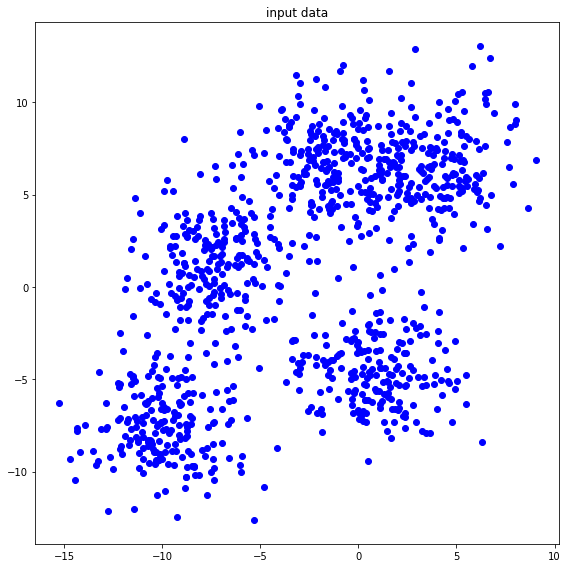

In [116]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

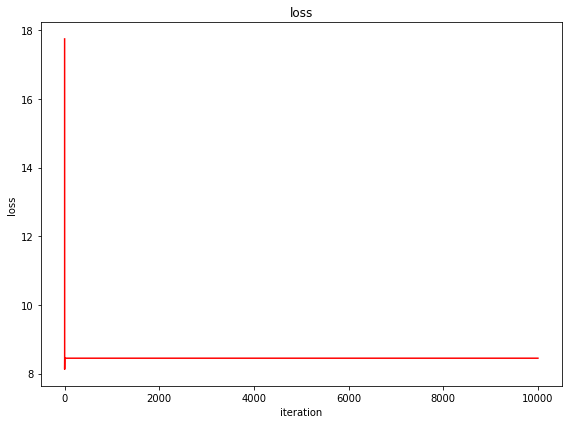

In [117]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

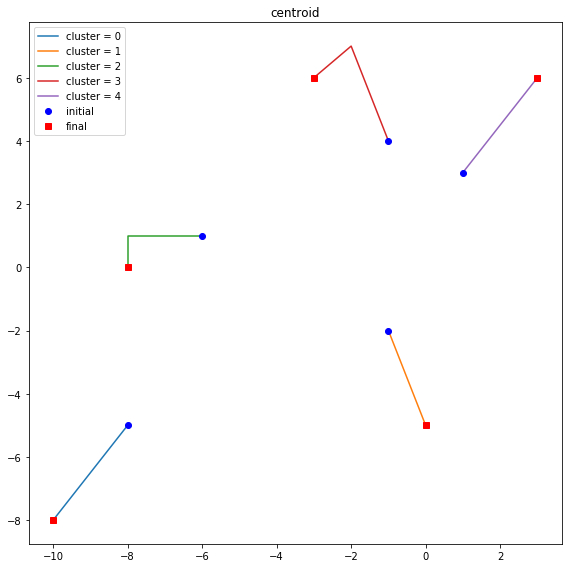

In [103]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

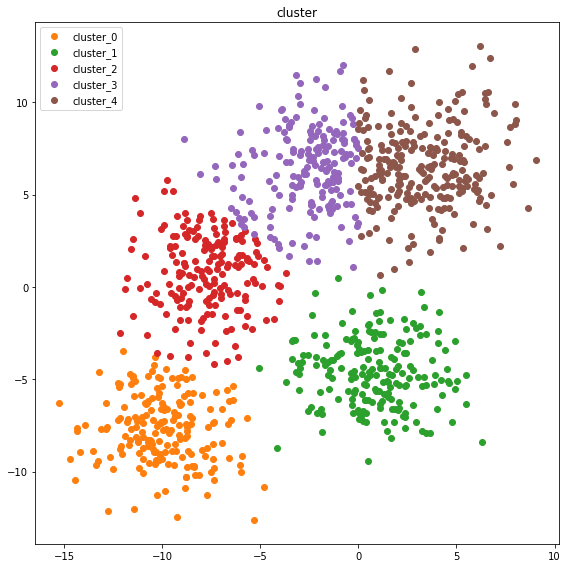

In [88]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

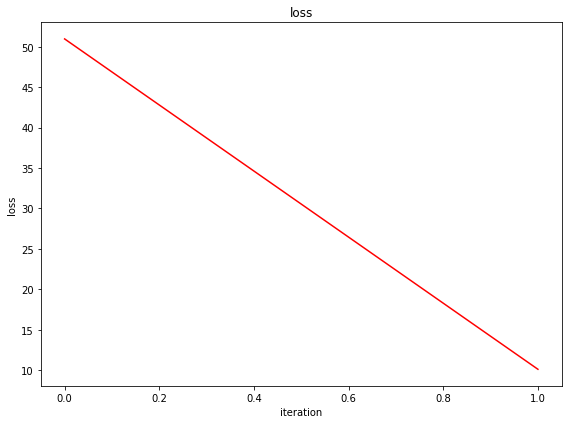

In [97]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

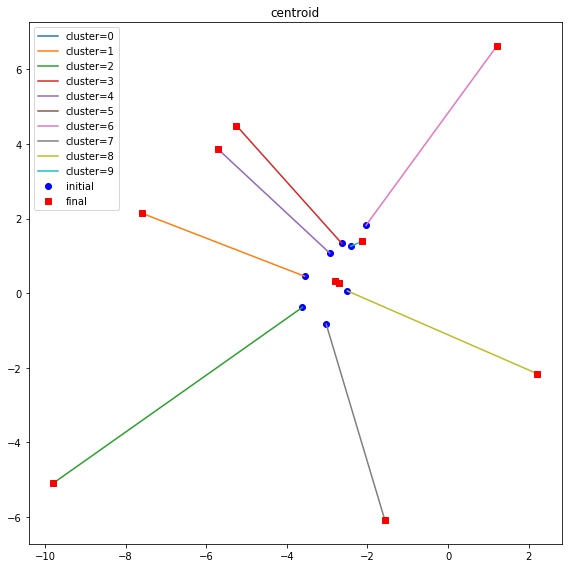

In [98]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

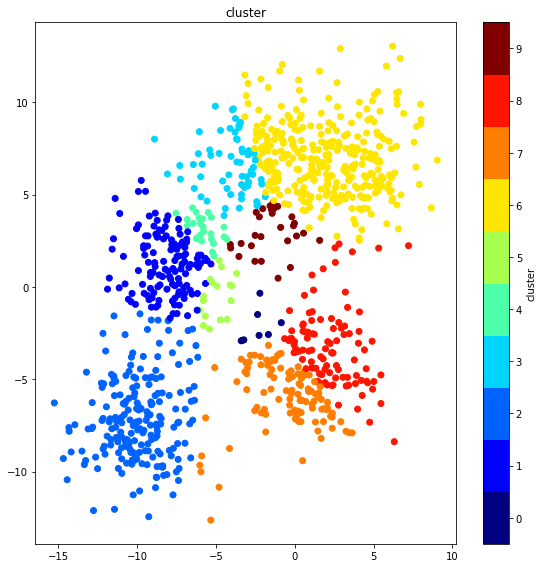

In [99]:
plot_cluster(feature, label_feature, label_cluster)

***